<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Semi_supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision boundary of label propagation versus SVM on the Iris dataset

Comparison for decision boundary generated on iris dataset between Label Propagation and SVM.

This demonstrates Label Propagation learning a good boundary even with a small amount of labeled data.

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_versus_svm_iris.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-versus-svm-iris-py

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading

rng = np.random.RandomState(0)

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
print(X.shape,y.shape)

(150, 2) (150,)


In [ ]:
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1 # mask 30% data
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1 # mask 50% data

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_30

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  1,
        1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  2, -1,
        2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2, -1, -1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2])

In [ ]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30)
ls50 = (LabelSpreading().fit(X, y_50), y_50)
ls100 = (LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)

In [ ]:
ls30

(LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_jobs=None,
                n_neighbors=7, tol=0.001),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
         0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  1,
         1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
         1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
        -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  2, -1,
         2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2, -1, -1,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2]))

In [ ]:
y_30

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  1,
        1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  2, -1,
        2,  2, -1,  2,  2,  2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2, -1,  2,  2, -1,  2,  2, -1, -1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2])

In [ ]:
# step size in the mesh
h = .02
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [ ]:
print(x_min,x_max,y_min,y_max)

3.3 8.9 1.0 5.4


In [ ]:
xx

array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       ...,
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]])

In [ ]:
xx.ravel()

array([3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88])

In [ ]:
yy

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
       ...,
       [5.34, 5.34, 5.34, ..., 5.34, 5.34, 5.34],
       [5.36, 5.36, 5.36, ..., 5.36, 5.36, 5.36],
       [5.38, 5.38, 5.38, ..., 5.38, 5.38, 5.38]])

In [ ]:
print(xx.shape,yy.shape)

(220, 280) (220, 280)


In [ ]:
xx.ravel().shape

(61600,)

In [ ]:
print(np.c_[xx.ravel(), yy.ravel()].shape)
np.c_[xx.ravel(), yy.ravel()]
# Lấy 2 cột features của X rồi chia mỗi cột thành 61k dữ liệu (thay vì 150 dữ liệu) cho prediction

(61600, 2)


array([[3.3 , 1.  ],
       [3.32, 1.  ],
       [3.34, 1.  ],
       ...,
       [8.84, 5.38],
       [8.86, 5.38],
       [8.88, 5.38]])

In [ ]:
Z=ls30[0].predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z

(61600,)


array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
print(y_train.shape)
y_train

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

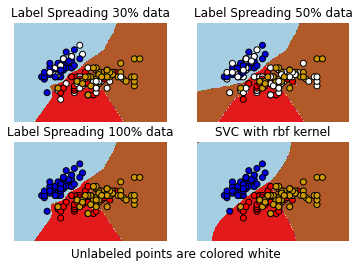

In [ ]:

# title for the plots
titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

    plt.title(titles[i])

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

Thuật toán Label Propagation sẽ học dữ liệu đã bị mask 30 hoặc 50%, sau đó nó sẽ dự đoán toàn bộ dữ liệu còn lại theo những gì mà nó đã học trước đó (61600 dữ liệu chia đều 0.02 step trên trục x và y - 3 mảng màu trên figure). Có thể thấy việc dự đoán này khá tốt vì đã phân chia tương đối rõ ràng các dữ liệu thuộc 3 nhóm khác nhau

Explain this chart:

In [ ]:
clf=ls30[0]
y_train=ls30[1]
print(y_train.shape)
print(xx.shape)
print(xx.ravel().shape)
print(np.c_[xx.ravel(), yy.ravel()].shape)

(150,)
(220, 280)
(61600,)
(61600, 2)


In [ ]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
print(Z.shape)
Z

(61600,)


array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
print(xx.shape) # h step one feature X
xx

(220, 280)


array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       ...,
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]])

In [ ]:
# Plot also the training points
Z = Z.reshape(xx.shape)
print(xx.shape)
print(Z.shape)
Z

(220, 280)
(220, 280)


array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

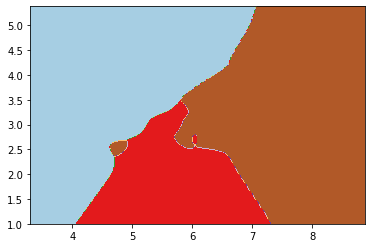

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
#plt.axis('off')

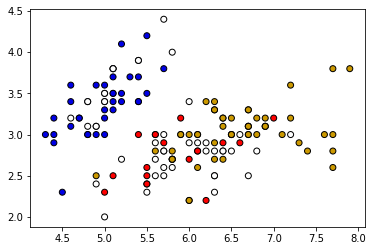

In [ ]:
# Plot also the training points
colors = [color_map[y] for y in y_train]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

In [ ]:
np.unique(y_train)

array([-1,  0,  1,  2])

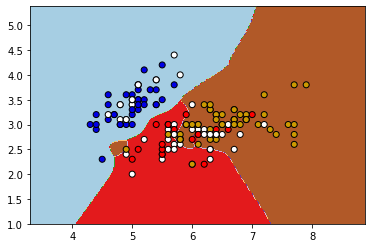

In [ ]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
#plt.axis('off')
# Plot also the training points
colors = [color_map[y] for y in y_train]
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='black')

# Label Propagation learning a complex structure

Example of LabelPropagation learning a complex internal structure to demonstrate “manifold learning”. The outer circle should be labeled “red” and the inner circle “blue”. Because both label groups lie inside their own distinct shape, we can see that the labels propagate correctly around the circle.

https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_structure.html#sphx-glr-auto-examples-semi-supervised-plot-label-propagation-structure-py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import LabelSpreading
from sklearn.datasets import make_circles

# generate ring with inner box
n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
print(X.shape,y.shape)

(200, 2) (200,)


In [ ]:
print(X[:5])
print(y[:5])

[[1.         0.        ]
 [0.99802673 0.06279052]
 [0.9921147  0.12533323]
 [0.98228725 0.18738131]
 [0.96858316 0.24868989]]
[0 0 0 0 0]


In [ ]:
outer, inner = 0, 1
labels = np.full(n_samples, -1.)
labels

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [ ]:
labels[0] = outer
labels[-1] = inner

In [ ]:
# Learn with LabelSpreading
label_spread = LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(X, labels)

LabelSpreading(alpha=0.8, gamma=20, kernel='knn', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [ ]:
output_labels = label_spread.transduction_
output_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Text(0.5, 1.0, 'Raw data (2 classes=outer and inner)')

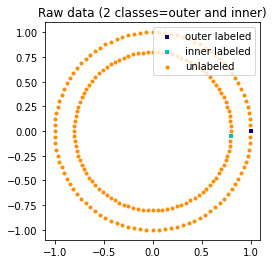

In [ ]:
# Plot output labels
output_labels = label_spread.transduction_
plt.figure(figsize=(8.5, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='navy',
            marker='s', lw=0, label="outer labeled", s=10)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='c',
            marker='s', lw=0, label='inner labeled', s=10)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='darkorange',
            marker='.', label='unlabeled')
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

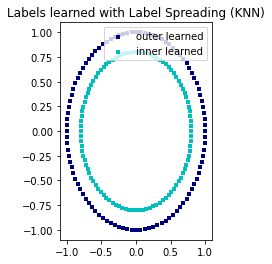

In [ ]:
plt.subplot(1, 2, 2)
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]
plt.scatter(X[outer_numbers, 0], X[outer_numbers, 1], color='navy',
            marker='s', lw=0, s=10, label="outer learned")
plt.scatter(X[inner_numbers, 0], X[inner_numbers, 1], color='c',
            marker='s', lw=0, s=10, label="inner learned")
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Labels learned with Label Spreading (KNN)")

#plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()

Thuật toán LabelSpreading này sử dụng kernel là KNN để clustering các giá trị trong tập dữ liệu mà không cần nhãn

# Label Propagation digits: Demonstrating performance

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

from sklearn.metrics import confusion_matrix, classification_report

digits = datasets.load_digits()
rng = np.random.RandomState(2)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:340]]
y = digits.target[indices[:340]]
images = digits.images[indices[:340]]

In [ ]:
print(X.shape)
X

(340, 64)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ..., 15.,  1.,  0.],
       [ 0.,  0.,  8., ..., 13.,  2.,  0.],
       ...,
       [ 0.,  1., 11., ...,  1.,  0.,  0.],
       [ 0.,  3., 16., ..., 16.,  8.,  0.],
       [ 0.,  0.,  0., ..., 16.,  8.,  0.]])

In [ ]:
print(y.shape)
y

(340,)


array([4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7,
       3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1,
       0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
       4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [ ]:
images.shape

(340, 8, 8)

In [ ]:
n_total_samples = len(y)
print('n_total_samples:',n_total_samples)
n_labeled_points = 40
indices = np.arange(n_total_samples)
unlabeled_set = indices[n_labeled_points:]

n_total_samples 340


In [ ]:
print(len(indices))
indices

340


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
print(len(unlabeled_set))
unlabeled_set

300


array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [ ]:
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1
y_train

array([ 4,  0,  9,  1,  4,  7,  1,  5,  1,  6,  6,  7,  6,  1,  5,  5,  4,
        6,  2,  7,  4,  6,  4,  1,  5,  2,  9,  5,  4,  6,  5,  6,  3,  4,
        0,  9,  9,  8,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
# Learn with LabelSpreading
lp_model = LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(X, y_train)

LabelSpreading(alpha=0.2, gamma=0.25, kernel='rbf', max_iter=20, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [ ]:
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]
true_labels

array([8, 8, 5, 7, 9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8,
       5, 4, 4, 7, 3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3,
       8, 7, 6, 4, 6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7,
       3, 7, 3, 9, 4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9,
       2, 1, 9, 1, 0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1,
       1, 6, 4, 8, 2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7,
       6, 9, 0, 0, 4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3,
       0, 2, 1, 5, 2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4,
       6, 5, 5, 5, 9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4,
       8, 6, 6, 2, 8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4,
       1, 3, 1, 2, 5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4,
       0, 1, 8, 6, 2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9, 2, 7, 2,
       1, 0, 8, 2, 8, 6, 5, 7, 8, 4, 5, 7, 8, 6, 5, 2, 6, 9, 3, 0, 0, 8,
       0, 6, 6, 7, 1, 4, 5, 6, 9, 7, 2, 8, 5, 1])

In [ ]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



#Label Propagation digits active learning

Demonstrates an active learning technique to learn handwritten digits using label propagation.

We start by training a label propagation model with only 10 labeled points, then we select the top five most uncertain points to label. Next, we train with 15 labeled points (original 10 + 5 new ones). We repeat this process four times to have a model trained with 30 labeled examples. Note you can increase this to label more than 30 by changing max_iterations. Labeling more than 30 can be useful to get a sense for the speed of convergence of this active learning technique.

A plot will appear showing the top 5 most uncertain digits for each iteration of training. These may or may not contain mistakes, but we will train the next model with their true labels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report, confusion_matrix

digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]

n_total_samples = len(y)
n_labeled_points = 40
print(X.shape,y.shape)
print(n_total_samples)

(330, 64) (330,)
330


In [ ]:
unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:] # 40 : 
unlabeled_indices.shape

(290,)

--------------------
i:  0
len unlabeled_indices:  290
predicted_labels:  290
true_labels:  290
Iteration 0 ______________________________________________________________________
Label Spreading model: 40 labeled & 290 unlabeled (330 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.78      0.69      0.73        26
           2       0.93      0.93      0.93        29
           3       1.00      0.89      0.94        27
           4       0.92      0.96      0.94        23
           5       0.96      0.70      0.81        33
           6       0.97      0.97      0.97        35
           7       0.94      0.91      0.92        33
           8       0.62      0.89      0.74        28
           9       0.73      0.79      0.76        34

    accuracy                           0.87       290
   macro avg       0.89      0.87      0.87       290
weighted avg       0.88      0.87      0.87       290



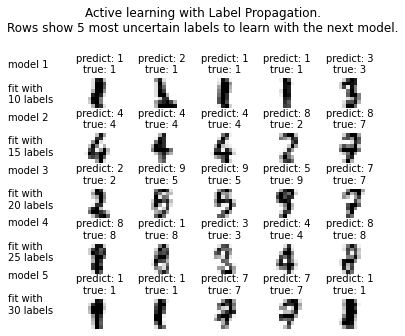

In [ ]:
f = plt.figure()
max_iterations = 5
for i in range(max_iterations):
    print('-'*20)
    print('i: ',i)
    print('len unlabeled_indices: ',len(unlabeled_indices))
    if len(unlabeled_indices) == 0:
        print("No unlabeled items left to label.")
        break
    y_train = np.copy(y)
    y_train[unlabeled_indices] = -1

    lp_model = LabelSpreading(gamma=0.25, max_iter=20)
    lp_model.fit(X, y_train)

    predicted_labels = lp_model.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]
    print('predicted_labels: ',len(predicted_labels))
    print('true_labels: ',len(true_labels))

    cm = confusion_matrix(true_labels, predicted_labels,
                          labels=lp_model.classes_)

    print("Iteration %i %s" % (i, 70 * "_"))
    print("Label Spreading model: %d labeled & %d unlabeled (%d total)"
          % (n_labeled_points, n_total_samples - n_labeled_points,
             n_total_samples))

    print(classification_report(true_labels, predicted_labels))

    #print("Confusion matrix")
    #print(cm)

    # compute the entropies of transduced label distributions
    pred_entropies = stats.distributions.entropy(
        lp_model.label_distributions_.T)

    # select up to 5 digit examples that the classifier is most uncertain about
    uncertainty_index = np.argsort(pred_entropies)[::-1]
    uncertainty_index = uncertainty_index[
        np.in1d(uncertainty_index, unlabeled_indices)][:5]
    print('uncertainty_index top 5: ',uncertainty_index)
    # keep track of indices that we get labels for
    delete_indices = np.array([], dtype=int)

    # for more than 5 iterations, visualize the gain only on the first 5
    if i < 5:
        f.text(.05, (1 - (i + 1) * .183),
               "model %d\n\nfit with\n%d labels" %
               ((i + 1), i * 5 + 10), size=10)
    for index, image_index in enumerate(uncertainty_index):
        print('for ------------')
        image = images[image_index]

        # for more than 5 iterations, visualize the gain only on the first 5
        if i < 5:
            sub = f.add_subplot(5, 5, index + 1 + (5 * i))
            sub.imshow(image, cmap=plt.cm.gray_r, interpolation='none')
            sub.set_title("predict: %i\ntrue: %i" % (
                lp_model.transduction_[image_index], y[image_index]), size=10)
            sub.axis('off')

        # labeling 5 points, remote from labeled set
        delete_index, = np.where(unlabeled_indices == image_index)
        delete_indices = np.concatenate((delete_indices, delete_index))
        print('delete_index',delete_index)
        print('delete_indices',delete_indices)

    unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
    n_labeled_points += len(uncertainty_index)
    print('unlabeled_indices',unlabeled_indices)
    print('n_labeled_points',n_labeled_points)

f.suptitle("Active learning with Label Propagation.\nRows show 5 most "
           "uncertain labels to learn with the next model.", y=1.15)
plt.subplots_adjust(left=0.2, bottom=0.03, right=0.9, top=0.9, wspace=0.2,
                    hspace=0.85)
plt.show()

## Explain

In [ ]:
unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:] # 40 : 
unlabeled_indices.shape

(290,)

In [ ]:
f = plt.figure()
max_iterations = 1
i=1
if len(unlabeled_indices) == 0:
    print("No unlabeled items left to label.")
y_train = np.copy(y)
y_train[unlabeled_indices] = -1

lp_model = LabelSpreading(gamma=0.25, max_iter=20)
lp_model.fit(X, y_train)

predicted_labels = lp_model.transduction_[unlabeled_indices]
true_labels = y[unlabeled_indices]

cm = confusion_matrix(true_labels, predicted_labels,
                      labels=lp_model.classes_)

print("Iteration %i %s" % (i, 70 * "_"))
print("Label Spreading model: %d labeled & %d unlabeled (%d total)"
      % (n_labeled_points, n_total_samples - n_labeled_points,
          n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

Iteration 1 ______________________________________________________________________
Label Spreading model: 40 labeled & 290 unlabeled (330 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.78      0.69      0.73        26
           2       0.93      0.93      0.93        29
           3       1.00      0.89      0.94        27
           4       0.92      0.96      0.94        23
           5       0.96      0.70      0.81        33
           6       0.97      0.97      0.97        35
           7       0.94      0.91      0.92        33
           8       0.62      0.89      0.74        28
           9       0.73      0.79      0.76        34

    accuracy                           0.87       290
   macro avg       0.89      0.87      0.87       290
weighted avg       0.88      0.87      0.87       290

Confusion matrix
[[22  0  0  0  0  0  0  0  0  0]
 [ 0 18  2  0  0  0  1  0  5  0]
 [ 0  0 27  0

<Figure size 432x288 with 0 Axes>

In [ ]:
X.shape

(330, 64)

In [ ]:
y_train # mask 290/330 labels

array([ 2,  8,  2,  6,  6,  7,  1,  9,  8,  5,  2,  8,  6,  6,  6,  6,  1,
        0,  5,  8,  8,  7,  8,  4,  7,  5,  4,  9,  2,  9,  4,  7,  6,  8,
        9,  4,  3,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
predicted_labels

array([8, 6, 7, 7, 1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 8, 6, 3, 0, 2,
       8, 4, 2, 9, 8, 6, 9, 8, 8, 3, 5, 1, 2, 1, 2, 2, 9, 7, 2, 3, 6, 0,
       9, 3, 7, 5, 1, 2, 9, 4, 3, 1, 7, 7, 4, 8, 5, 8, 5, 9, 2, 5, 8, 0,
       7, 1, 4, 7, 3, 4, 8, 9, 7, 7, 8, 2, 1, 9, 2, 9, 8, 4, 8, 7, 0, 6,
       1, 5, 8, 9, 9, 5, 9, 9, 5, 7, 9, 6, 2, 8, 6, 9, 6, 1, 5, 8, 5, 9,
       9, 1, 9, 3, 6, 8, 8, 4, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1,
       0, 4, 2, 6, 3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 8, 7, 9, 7, 8,
       0, 7, 8, 9, 6, 4, 5, 0, 1, 4, 6, 4, 3, 8, 0, 9, 5, 9, 2, 1, 4, 8,
       1, 6, 1, 9, 2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0,
       7, 6, 1, 8, 9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 8, 7, 2, 7, 9, 5, 8, 0,
       9, 6, 6, 5, 9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 1, 8, 8, 4, 6,
       7, 5, 2, 1, 5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0, 1, 7, 2,
       0, 9, 6, 0, 4, 2, 0, 7, 5, 8, 5, 4, 8, 2, 8, 4, 3, 8, 2, 6, 7, 1,
       5, 1, 0, 8])

In [ ]:
true_labels

array([8, 6, 7, 7, 1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2,
       3, 4, 1, 9, 2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0,
       5, 3, 7, 5, 1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0,
       7, 1, 4, 7, 3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6,
       1, 5, 9, 9, 9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9,
       9, 1, 5, 3, 6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1,
       0, 4, 1, 6, 3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8,
       0, 7, 8, 9, 6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2,
       1, 6, 8, 9, 2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0,
       7, 6, 1, 1, 9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0,
       9, 1, 6, 5, 9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6,
       7, 5, 2, 4, 5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0, 1, 7, 2,
       0, 9, 6, 0, 4, 2, 0, 7, 9, 8, 5, 4, 8, 2, 8, 4, 3, 7, 2, 6, 9, 1,
       5, 1, 0, 8])

In [ ]:
print(lp_model.label_distributions_.shape)
lp_model.label_distributions_

(330, 10)


array([[6.76139169e-148, 5.72305415e-087, 1.00000000e+000, ...,
        7.12758726e-105, 4.00562208e-100, 1.32090505e-125],
       [2.04821888e-135, 1.69838403e-093, 6.46808196e-093, ...,
        4.00244949e-104, 1.00000000e+000, 4.47267749e-105],
       [3.61168452e-155, 9.68369380e-072, 1.00000000e+000, ...,
        7.32550381e-090, 3.82877354e-092, 1.23111626e-121],
       ...,
       [9.29894507e-104, 1.00000000e+000, 1.71648010e-023, ...,
        2.64230899e-105, 1.13437608e-054, 8.84406591e-085],
       [1.00000000e+000, 3.50052270e-105, 8.83343079e-128, ...,
        1.12375483e-134, 5.85020968e-063, 1.34922827e-062],
       [2.24251366e-103, 1.73043169e-061, 3.36141191e-066, ...,
        2.85627932e-063, 1.00000000e+000, 4.74753770e-073]])

In [ ]:
print(lp_model.label_distributions_.T.shape)
lp_model.label_distributions_.T

(10, 330)


array([[6.76139169e-148, 2.04821888e-135, 3.61168452e-155, ...,
        9.29894507e-104, 1.00000000e+000, 2.24251366e-103],
       [5.72305415e-087, 1.69838403e-093, 9.68369380e-072, ...,
        1.00000000e+000, 3.50052270e-105, 1.73043169e-061],
       [1.00000000e+000, 6.46808196e-093, 1.00000000e+000, ...,
        1.71648010e-023, 8.83343079e-128, 3.36141191e-066],
       ...,
       [7.12758726e-105, 4.00244949e-104, 7.32550381e-090, ...,
        2.64230899e-105, 1.12375483e-134, 2.85627932e-063],
       [4.00562208e-100, 1.00000000e+000, 3.82877354e-092, ...,
        1.13437608e-054, 5.85020968e-063, 1.00000000e+000],
       [1.32090505e-125, 4.47267749e-105, 1.23111626e-121, ...,
        8.84406591e-085, 1.34922827e-062, 4.74753770e-073]])

In [ ]:
# compute the entropies of transduced label distributions
pred_entropies = stats.distributions.entropy(
    lp_model.label_distributions_.T)
print(pred_entropies.shape)
pred_entropies[:20]

(330,)


array([1.13648638e-084, 1.73579568e-090, 1.58343581e-069, 7.70197579e-081,
       1.27441557e-064, 4.47893496e-066, 2.92176551e-052, 1.78775573e-054,
       3.08295672e-043, 5.30506593e-113, 6.83967093e-074, 1.35291277e-056,
       6.72229333e-059, 5.42754608e-085, 1.19207086e-052, 4.55594368e-074,
       8.69792009e-080, 3.33251447e-081, 9.19207094e-096, 2.06946145e-054])

In [ ]:
np.argsort(pred_entropies)

array([  9, 293,  72, 100,  39, 145, 148, 302,  21,  18,  87, 257, 146,
         1, 106,  13,   0, 236, 322,  17,   3, 230, 239, 182, 216,  16,
       151,  24, 139, 306,  73,  93, 262, 325,  15,  10, 137, 283, 136,
       172, 286,  35,  38,   2, 304, 220, 244,  49, 266, 127, 154,  55,
       109,  88,  77, 161, 254,  94, 275,   5, 224,  58, 212, 162,   4,
       198, 233, 307,  32, 117, 235,  26, 108, 296, 180,  23,  98,  25,
       133,  28, 195, 188,  60, 237, 194, 328, 310, 329, 192, 201, 214,
        12, 259,  70, 248, 247,  11,  37, 279, 129, 142, 276, 204, 303,
        44, 213,  41, 164, 229, 314, 103, 323,  51,  63, 123,   7, 316,
       116,  19, 288, 278, 317, 297, 308, 111,  30, 199, 150, 221,  14,
        45,  79,  43, 159,  31,  46, 271, 160, 246,   6,  33,  95, 243,
       253, 311, 265, 114, 144,  36, 240, 166, 196, 126, 105, 300,  82,
       245, 208, 290,  96, 292,  83, 225, 281, 178,  42, 298, 284,  74,
        80,  54,  34,  20, 184, 269, 209, 165, 219,  29, 134,  5

In [ ]:
# select up to 5 digit examples that the classifier is most uncertain about
uncertainty_index = np.argsort(pred_entropies)[::-1]
print(uncertainty_index.shape)
uncertainty_index

(330,)


array([128,  64, 202, 171,  71, 289, 205, 174, 280, 234,  66, 258, 189,
       321, 241, 252, 226,  84, 101, 147, 312,  56, 218, 324, 273, 185,
       118, 104, 250,  47, 115, 285, 121, 175,  62, 215, 183, 138, 155,
        69, 152,  81,  53, 232, 130, 264, 222, 227, 274, 186, 207, 210,
       301,  57,  67,  90, 261, 315, 251, 179, 190,  68, 282,  86,  85,
       320, 124, 277,  61, 217, 156,  75, 256, 119, 191, 107, 327,  40,
       125, 112, 120, 255, 153,  59, 206, 110, 295, 299, 187, 135, 143,
       158,  97,  99, 173, 157,  91, 122, 177, 318, 141, 169, 270, 287,
       223, 167,  92, 102, 228, 309, 140, 211, 267, 319,  48, 176, 305,
       193, 272, 268,  65, 170, 203, 294, 313, 113, 263, 200, 260, 131,
       291, 181, 132, 163, 231,  50, 242, 149, 197, 168,  78,  27,  22,
         8, 249,  76,  89, 326, 238,  52, 134,  29, 219, 165, 209, 269,
       184,  20,  34,  54,  80,  74, 284, 298,  42, 178, 281, 225,  83,
       292,  96, 290, 208, 245,  82, 300, 105, 126, 196, 166, 24

In [ ]:
unlabeled_indices

array([ 40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  58,  59,  60,  61,  62,  63,  65,  67,  68,  70,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 119, 120, 121, 122, 123, 125, 126, 127, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170,
       172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 24

In [ ]:
np.in1d(uncertainty_index, unlabeled_indices)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
uncertainty_index = uncertainty_index[np.in1d(uncertainty_index, unlabeled_indices)][:5]
uncertainty_index # Image index ?

array([273, 104, 118,  47, 124])

In [ ]:
# keep track of indices that we get labels for
delete_indices = np.array([], dtype=int)
delete_indices

array([], dtype=int64)

In [ ]:
for index, image_index in enumerate(uncertainty_index):
    # labeling 5 points, remote from labeled set
    delete_index, = np.where(unlabeled_indices == image_index)
    delete_indices = np.concatenate((delete_indices, delete_index))
    print('delete_index',delete_index)
    print('delete_indices',delete_indices)

unlabeled_indices = np.delete(unlabeled_indices, delete_indices)
n_labeled_points += len(uncertainty_index)
print('unlabeled_indices',unlabeled_indices)
print('n_labeled_points',n_labeled_points)

delete_index []
delete_indices []
delete_index []
delete_indices []
delete_index []
delete_indices []
delete_index []
delete_indices []
delete_index []
delete_indices []
unlabeled_indices [ 40  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  58  59
  60  61  62  63  65  67  68  70  72  73  74  75  76  77  78  79  80  81
  82  83  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 102 103 105 106 107 108 109 110 111 112 113 114 115 116 117 119 120 121
 122 123 125 126 127 129 130 131 132 133 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 159 160
 161 162 163 164 165 166 168 169 170 172 173 174 175 176 177 178 180 181
 182 183 184 185 186 187 188 190 191 192 193 194 195 196 197 198 199 200
 201 203 204 206 207 208 209 210 211 212 213 214 215 216 217 219 220 221
 222 223 224 225 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 253 254 255 256 257 259 260
 261 262 

# Try Breast_cancer

In [74]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()


#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss ,balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer,roc_curve, auc,precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score,average_precision_score 

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading

rng = np.random.RandomState(0)

file = datasets.load_breast_cancer()
X = file.data
y = file.target
print(X.shape,y.shape)

(569, 30) (569,)


In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
np.unique(y)

array([0, 1])

## Base line

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                     random_state = 42,stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [ ]:
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
#print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[38  4]
 [ 1 71]]
Balanced accuracy score: 0.9454365079365079
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.9, 
                                                     random_state = 42,stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
#print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

(56, 30) (56,)
(513, 30) (513,)
[[167  24]
 [ 22 300]]
Balanced accuracy score: 0.9030112841858802
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       191
           1       0.93      0.93      0.93       322

    accuracy                           0.91       513
   macro avg       0.90      0.90      0.90       513
weighted avg       0.91      0.91      0.91       513



## Semi supervised with Label progapagation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading

file = datasets.load_breast_cancer()
X = file.data
y = file.target
print(X.shape,y.shape)

(569, 30) (569,)


In [ ]:
n_total_samples = len(y)
indices = np.arange(n_total_samples)
print(indices.shape)
indices[:20]

(569,)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
true_label_percentage=0.1
n_labeled_points = int(true_label_percentage*n_total_samples) 
print(n_labeled_points)
unlabeled_set = indices[n_labeled_points:]
print(unlabeled_set.shape)
unlabeled_set[:20]

56
(513,)


array([56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75])

In [ ]:
# Shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1

In [ ]:
y_train[:80]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,
        1,  1,  0,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
# Learn with LabelSpreading
lp_model = LabelSpreading(gamma=.25, max_iter=20)
lp_model.fit(X, y_train)
# prediction for unlabeled set only
y_pred = lp_model.transduction_[unlabeled_set]
y_test = y[unlabeled_set]

print(confusion_matrix(y_test,y_pred))
#print('Accuracy score:',accuracy_score(y_test,y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[164   3]
 [ 92 254]]
Balanced accuracy score: 0.8580699871932436
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       167
           1       0.99      0.73      0.84       346

    accuracy                           0.81       513
   macro avg       0.81      0.86      0.81       513
weighted avg       0.88      0.81      0.82       513



/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


Try several percentage true label not mask:


In [ ]:
list_percentage=[0.1,0.2,0.3,0.4,0.5,0.7,0.8]
for i in list_percentage:
  print('Percentage true label: ',i)
  true_label_percentage=i
  n_labeled_points = int(true_label_percentage*n_total_samples) 
  print(n_labeled_points)
  unlabeled_set = indices[n_labeled_points:]
  print(unlabeled_set.shape)
  # Shuffle everything around
  y_train = np.copy(y)
  y_train[unlabeled_set] = -1
  # Learn with LabelSpreading
  lp_model = LabelSpreading(gamma=.25, max_iter=20)
  lp_model.fit(X, y_train)
  # prediction for unlabeled set only
  y_pred = lp_model.transduction_[unlabeled_set]
  y_test = y[unlabeled_set]

  print(confusion_matrix(y_test,y_pred))
  #print('Accuracy score:',accuracy_score(y_test,y_pred))
  print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

Percentage true label:  0.1
56
(513,)
[[164   3]
 [ 92 254]]
Balanced accuracy score: 0.8580699871932436
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       167
           1       0.99      0.73      0.84       346

    accuracy                           0.81       513
   macro avg       0.81      0.86      0.81       513
weighted avg       0.88      0.81      0.82       513

Percentage true label:  0.2
113
(456,)


/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[[135   9]
 [ 55 257]]
Balanced accuracy score: 0.8806089743589743
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       144
           1       0.97      0.82      0.89       312

    accuracy                           0.86       456
   macro avg       0.84      0.88      0.85       456
weighted avg       0.89      0.86      0.86       456

Percentage true label:  0.3
170
(399,)
[[106  17]
 [ 38 238]]
Balanced accuracy score: 0.8620537292329445
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       123
           1       0.93      0.86      0.90       276

    accuracy                           0.86       399
   macro avg       0.83      0.86      0.85       399
weighted avg       0.87      0.86      0.86       399

Percentage true label:  0.4
227
(342,)
[[ 86   9]
 [ 33 214]]
Balanced accuracy score: 0.8858299595141701
              precision    recall  f1-score   support

           0

/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


[[ 36   3]
 [ 11 121]]
Balanced accuracy score: 0.9198717948717949
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        39
           1       0.98      0.92      0.95       132

    accuracy                           0.92       171
   macro avg       0.87      0.92      0.89       171
weighted avg       0.93      0.92      0.92       171

Percentage true label:  0.8
455
(114,)
[[23  3]
 [ 6 82]]
Balanced accuracy score: 0.9082167832167831
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        26
           1       0.96      0.93      0.95        88

    accuracy                           0.92       114
   macro avg       0.88      0.91      0.89       114
weighted avg       0.93      0.92      0.92       114



/usr/local/lib/python3.6/dist-packages/sklearn/semi_supervised/_label_propagation.py:293: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


## Try classification with clustering

### Kmean (so so)

In [84]:
import collections, numpy

In [85]:
file = datasets.load_breast_cancer()
X = file.data
y = file.target
print(X.shape,y.shape)

(569, 30) (569,)


In [86]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                     random_state = 42,stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [90]:
pd.Series(y).value_counts()

1    357
0    212
dtype: int64

In [91]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train) #
y_pred=kmeans.predict(X_test)
print(collections.Counter(y_pred))
y_pred[y_pred == 0]=2
y_pred[y_pred == 1]=0
y_pred[y_pred == 2]=1
print(collections.Counter(y_pred))

Counter({0: 86, 1: 28})
Counter({1: 86, 0: 28})


In [92]:
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.8333333333333333
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        42
           1       0.84      1.00      0.91        72

    accuracy                           0.88       114
   macro avg       0.92      0.83      0.86       114
weighted avg       0.90      0.88      0.87       114



In [ ]:
kmeans.cluster_centers_

array([[1.25252330e+01, 1.85455114e+01, 8.08969318e+01, 4.93918466e+02,
        9.44911932e-02, 9.01074148e-02, 6.25259991e-02, 3.28653068e-02,
        1.77215057e-01, 6.33970455e-02, 3.03363068e-01, 1.22366790e+00,
        2.14338722e+00, 2.37431960e+01, 7.20699716e-03, 2.36134489e-02,
        2.92863341e-02, 1.05061506e-02, 2.08103068e-02, 3.77418494e-03,
        1.40087727e+01, 2.47088068e+01, 9.16829830e+01, 6.17094034e+02,
        1.29514545e-01, 2.22715170e-01, 2.21655048e-01, 9.04615085e-02,
        2.83444886e-01, 8.32046875e-02],
       [1.93368932e+01, 2.16459223e+01, 1.27989320e+02, 1.17696019e+03,
        1.01895922e-01, 1.50898447e-01, 1.80328252e-01, 1.01241845e-01,
        1.92247573e-01, 6.08469903e-02, 7.25712621e-01, 1.20185146e+00,
        5.14357282e+00, 9.22165049e+01, 6.66214563e-03, 3.21150194e-02,
        4.37144660e-02, 1.56597184e-02, 2.06712621e-02, 3.87622330e-03,
        2.35878641e+01, 2.88545631e+01, 1.57690291e+02, 1.73000000e+03,
        1.41946990e-01,

In [93]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train) #
y_pred=kmeans.predict(X_train)
print(collections.Counter(y_pred))
y_pred[y_pred == 0]=2
y_pred[y_pred == 1]=0
y_pred[y_pred == 2]=1
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

Counter({0: 352, 1: 103})
Counter({1: 352, 0: 103})
Balanced accuracy score: 0.7982456140350878
              precision    recall  f1-score   support

           0       0.99      0.60      0.75       170
           1       0.81      1.00      0.89       285

    accuracy                           0.85       455
   macro avg       0.90      0.80      0.82       455
weighted avg       0.88      0.85      0.84       455



### Hierarchical clustering (very good)

In [ ]:
!pip install fastcluster

     |████████████████████████████████| 163kB 3.2MB/s 


In [94]:
import fastcluster
from scipy.cluster.hierarchy import fcluster,dendrogram, cophenet
from scipy.spatial.distance import pdist
import collections, numpy

In [95]:
Z = fastcluster.linkage_vector(X_test,method='ward', metric='euclidean')
distance_threshold = 5000 
clusters = fcluster(Z, distance_threshold, criterion='distance')
y_pred = clusters
print("Number of distinct clusters: ",len(set(y_pred)))
print(collections.Counter(y_pred))
y_pred[y_pred == 2]=0
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Number of distinct clusters:  2
Counter({1: 86, 2: 28})
Counter({1: 86, 0: 28})
Balanced accuracy score: 0.8333333333333333
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        42
           1       0.84      1.00      0.91        72

    accuracy                           0.88       114
   macro avg       0.92      0.83      0.86       114
weighted avg       0.90      0.88      0.87       114



In [96]:
Z = fastcluster.linkage_vector(X_train,method='ward', metric='euclidean')
distance_threshold = 8000 
clusters = fcluster(Z, distance_threshold, criterion='distance')
y_pred = clusters
print("Number of distinct clusters: ",len(set(y_pred)))
print(collections.Counter(y_pred))
y_pred[y_pred == 1]=0
y_pred[y_pred == 2]=1
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

Number of distinct clusters:  2
Counter({2: 380, 1: 75})
Counter({1: 380, 0: 75})
Balanced accuracy score: 0.7205882352941176
              precision    recall  f1-score   support

           0       1.00      0.44      0.61       170
           1       0.75      1.00      0.86       285

    accuracy                           0.79       455
   macro avg       0.88      0.72      0.73       455
weighted avg       0.84      0.79      0.77       455



### DBSCAN (not good)

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
distances = np.sort(distances, axis=0)

Find optimal esp

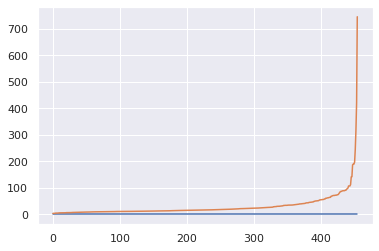

In [ ]:
plt.plot(distances)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
eps = 300
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, 
            n_jobs=n_jobs)
y_pred = db.fit_predict(X_test)
print("Number of distinct clusters: ",len(set(y_pred)))
print(collections.Counter(y_pred))
y_pred[y_pred == 2]=0
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Number of distinct clusters:  2
Counter({0: 110, -1: 4})
Balanced accuracy score: 0.4523809523809524
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.35      0.90      0.50        42
           1       0.00      0.00      0.00        72

    accuracy                           0.33       114
   macro avg       0.12      0.30      0.17       114
weighted avg       0.13      0.33      0.18       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### HDBSCAN (not good)

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301786 sha256=a4728d17599ba7aceb8f97462d73285159a0dd72b04823d182c970d0264a7baf
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
import hdbscan

min_cluster_size = 6
min_samples = None
alpha = 1.0
cluster_selection_method = 'eom'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
        min_samples=min_samples, alpha=alpha, \
        cluster_selection_method=cluster_selection_method)
y_pred = hdb.fit_predict(X_test)
print(collections.Counter(y_pred))
#y_pred[y_pred == 2]=0
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Counter({1: 85, 0: 20, -1: 9})
Balanced accuracy score: 0.7380952380952381
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.48      0.65        42
           1       0.85      1.00      0.92        72

    accuracy                           0.81       114
   macro avg       0.62      0.49      0.52       114
weighted avg       0.90      0.81      0.82       114



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Compare all method

In [77]:
pd.Series(y_test).value_counts()

1    72
0    42
dtype: int64

In [78]:
pd.Series(y_train).value_counts()

1    285
0    170
dtype: int64

In [80]:
import time
import warnings
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph

X=X_test
time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 2, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means),
    #('AffinityPropagation', affinity_propagation),
    #('MeanShift', ms),
    ('SpectralClustering (D)', spectral),
    ('Agglomerative-ward (D)', ward), # OK
    ('Agglomerative-average_linkage (D)', average_linkage),
    #('DBSCAN', dbscan),
    #('OPTICS', optics),
    ('Birch (D)', birch), # OK
    ('GaussianMixture (D)', gmm) #OK
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    print(collections.Counter(y_pred))   
    print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    #---------------DNN add-----------------------




MiniBatchKMeans (D)
Counter({0: 86, 1: 28})
Balanced accuracy score: 0.16666666666666666
              precision    recall  f1-score   support

           0       0.16      0.33      0.22        42
           1       0.00      0.00      0.00        72

    accuracy                           0.12       114
   macro avg       0.08      0.17      0.11       114
weighted avg       0.06      0.12      0.08       114

SpectralClustering (D)
Counter({0: 77, 1: 37})
Balanced accuracy score: 0.7380952380952381
              precision    recall  f1-score   support

           0       0.53      0.98      0.69        42
           1       0.97      0.50      0.66        72

    accuracy                           0.68       114
   macro avg       0.75      0.74      0.67       114
weighted avg       0.81      0.68      0.67       114

Agglomerative-ward (D)
Counter({1: 86, 0: 28})
Balanced accuracy score: 0.8333333333333333
              precision    recall  f1-score   support

           0       1

In [79]:
import time
import warnings
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph

X=X_train
time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 2, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means),
    #('AffinityPropagation', affinity_propagation),
    #('MeanShift', ms),
    ('SpectralClustering (D)', spectral),
    ('Agglomerative-ward (D)', ward), # OK
    ('Agglomerative-average_linkage (D)', average_linkage),
    #('DBSCAN', dbscan),
    #('OPTICS', optics),
    ('Birch (D)', birch), # OK
    ('GaussianMixture (D)', gmm) #OK
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)
    print(collections.Counter(y_pred))   
    y_pred[y_pred == 0]=2
    y_pred[y_pred == 1]=0
    y_pred[y_pred == 2]=1
    print(collections.Counter(y_pred)) 
    print('Balanced accuracy score:',balanced_accuracy_score(y_train,y_pred))
    print(classification_report(y_train,y_pred))
    
    #---------------DNN add-----------------------




MiniBatchKMeans (D)
Counter({0: 350, 1: 105})
Counter({1: 350, 0: 105})
Balanced accuracy score: 0.8041279669762642
              precision    recall  f1-score   support

           0       0.99      0.61      0.76       170
           1       0.81      1.00      0.89       285

    accuracy                           0.85       455
   macro avg       0.90      0.80      0.83       455
weighted avg       0.88      0.85      0.84       455

SpectralClustering (D)
Counter({1: 237, 0: 218})
Counter({0: 237, 1: 218})
Balanced accuracy score: 0.8589783281733746
              precision    recall  f1-score   support

           0       0.70      0.97      0.81       170
           1       0.98      0.75      0.85       285

    accuracy                           0.83       455
   macro avg       0.84      0.86      0.83       455
weighted avg       0.87      0.83      0.83       455

Agglomerative-ward (D)
Counter({0: 380, 1: 75})
Counter({1: 380, 0: 75})
Balanced accuracy score: 0.72058823529

# Try with churn telecom

In [97]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()


#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss ,balanced_accuracy_score,matthews_corrcoef
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer,roc_curve, auc,precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score,average_precision_score 

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [98]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preprocess data

In [99]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

Standard scaler

In [100]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df = df.dropna()

In [101]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean())/df['MonthlyCharges'].std()

df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean())/df['TotalCharges'].std()

df['tenure'] = (df['tenure'] - df['tenure'].mean())/df['tenure'].std()

One hot encoding

In [102]:
dummy_cols = []
# column with value
sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)
# for other column with category, only one hot with column have nuique < 5
for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]        
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,DependentsNo,DependentsYes,PhoneServiceNo,PhoneServiceYes,MultipleLinesNo,MultipleLinesNo phone service,MultipleLinesYes,InternetServiceDSL,InternetServiceFiber optic,InternetServiceNo,OnlineSecurityNo,OnlineSecurityNo internet service,OnlineSecurityYes,OnlineBackupNo,OnlineBackupNo internet service,OnlineBackupYes,DeviceProtectionNo,DeviceProtectionNo internet service,DeviceProtectionYes,TechSupportNo,TechSupportNo internet service,TechSupportYes,StreamingTVNo,StreamingTVNo internet service,StreamingTVYes,StreamingMoviesNo,StreamingMoviesNo internet service,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0.064298,0.032896,0.389269,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,-1.239416,-0.061298,-1.452520,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0.512450,-0.467578,0.372439,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,-1.239416,0.396862,-1.234860,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,-0.994970,0.974468,-0.147808,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,-0.424595,0.786142,0.409363,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
7,-0.913487,-1.059891,-0.791550,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,-0.180148,1.059269,0.696733,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
9,1.205048,0.009088,0.783956,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [103]:
X = sample_set.drop(columns='Churn')
y= sample_set['Churn']
print(X.shape)
print(y.shape)

(7032, 46)
(7032,)


In [104]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                     random_state = 42,stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5625, 46) (5625,)
(1407, 46) (1407,)


## Base Model

In [105]:
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.7158424401178232
Matthews_corrcoef accuracy score: 0.45801309453634315
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [106]:
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.7081898939281777
Matthews_corrcoef accuracy score: 0.4432922409989514
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



All the documentation says that is should be:

scale_pos_weight = count(negative examples)/count(Positive examples)

In practice, that works pretty well, but if your dataset is extremely unbalanced I'd recommend using something more conservative like:

scale_pos_weight = sqrt(count(negative examples)/count(Positive examples)) 

This is useful to limit the effect of a multiplication of positive examples by a very high weight.

In [107]:
weights=y_train.value_counts()
weights

0    4130
1    1495
Name: Churn, dtype: int64

In [108]:
model=XGBClassifier(scale_pos_weight=int(weights[0]/weights[1]))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.763858187823224
Matthews_corrcoef accuracy score: 0.48455160312337614
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1033
           1       0.55      0.75      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407



Try with test_size = 0.8

In [109]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, 
                                                     random_state = 42,stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1406, 46) (1406,)
(5626, 46) (5626,)


In [110]:
model=XGBClassifier(scale_pos_weight=int(weights[0]/weights[1]))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.739390075366205
Matthews_corrcoef accuracy score: 0.4621161533517696
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4131
           1       0.58      0.65      0.61      1495

    accuracy                           0.78      5626
   macro avg       0.72      0.74      0.73      5626
weighted avg       0.79      0.78      0.79      5626



## Semi supervised with Label progapagation

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading

In [112]:
y=y.array

In [113]:
n_total_samples = len(y)
indices = np.arange(n_total_samples)
print(indices.shape)
list_percentage=[0.1,0.2,0.3,0.4,0.5,0.7,0.8]
for i in list_percentage:
  print('Percentage true label: ',i)
  true_label_percentage=i
  n_labeled_points = int(true_label_percentage*n_total_samples) 
  print('n_labeled_points: ',n_labeled_points)
  unlabeled_set = indices[n_labeled_points:]
  print('unlabeled_set: ',unlabeled_set.shape)
  # Shuffle everything around
  y_train = np.copy(y)
  y_train[unlabeled_set] = -1
  # Learn with LabelSpreading
  lp_model = LabelSpreading(gamma=.25, max_iter=20)
  lp_model.fit(X, y_train)
  # prediction for unlabeled set only
  y_pred = lp_model.transduction_[unlabeled_set]
  y_test = y[unlabeled_set]

  print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
  print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
  print(classification_report(y_test,y_pred))

(7032,)
Percentage true label:  0.1
n_labeled_points:  703
unlabeled_set:  (6329,)
Balanced accuracy score: 0.6026542704645378
Matthews_corrcoef accuracy score: 0.3223611089517321
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      4636
           1       0.73      0.24      0.36      1693

    accuracy                           0.77      6329
   macro avg       0.75      0.60      0.61      6329
weighted avg       0.76      0.77      0.73      6329

Percentage true label:  0.2
n_labeled_points:  1406
unlabeled_set:  (5626,)
Balanced accuracy score: 0.6387199646364181
Matthews_corrcoef accuracy score: 0.3798435351834359
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4131
           1       0.72      0.32      0.45      1495

    accuracy                           0.79      5626
   macro avg       0.76      0.64      0.66      5626
weighted avg       0.78      0.79      0.76     

## Try classification with clustering

K means

In [114]:
import collections, numpy

In [115]:
pd.Series(y).value_counts()

0    5163
1    1869
dtype: int64

In [116]:
X_train,  X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                     random_state = 42,stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5625, 46) (5625,)
(1407, 46) (1407,)


In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_test) #
y_pred=kmeans.predict(X_test)
print(collections.Counter(y_pred))
y_pred[y_pred == 0]=2
y_pred[y_pred == 1]=0
y_pred[y_pred == 2]=1
print(collections.Counter(y_pred))

Counter({0: 1095, 1: 312})
Counter({1: 1095, 0: 312})


In [118]:
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.6073142448918316
              precision    recall  f1-score   support

           0       0.92      0.28      0.43      1033
           1       0.32      0.94      0.48       374

    accuracy                           0.45      1407
   macro avg       0.62      0.61      0.45      1407
weighted avg       0.76      0.45      0.44      1407



In [120]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train) #
y_pred=kmeans.predict(X_train)
print(collections.Counter(y_pred))
y_pred[y_pred == 0]=2
y_pred[y_pred == 1]=0
y_pred[y_pred == 2]=1
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

Counter({0: 4417, 1: 1208})
Counter({1: 4417, 0: 1208})
Balanced accuracy score: 0.6057062686760549
              precision    recall  f1-score   support

           0       0.93      0.27      0.42      4130
           1       0.32      0.94      0.48      1495

    accuracy                           0.45      5625
   macro avg       0.62      0.61      0.45      5625
weighted avg       0.76      0.45      0.43      5625



Hierarchical clustering

In [54]:
!pip install fastcluster

     |████████████████████████████████| 163kB 4.2MB/s 


In [66]:
import fastcluster
from scipy.cluster.hierarchy import fcluster,dendrogram, cophenet
from scipy.spatial.distance import pdist
import collections, numpy

In [121]:
Z = fastcluster.linkage_vector(X_test,method='ward', metric='euclidean')
distance_threshold = 70 
clusters = fcluster(Z, distance_threshold, criterion='distance')
y_pred = clusters
print("Number of distinct clusters: ",len(set(y_pred)))
print(collections.Counter(y_pred))
y_pred[y_pred == 1]=0
y_pred[y_pred == 2]=1
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Number of distinct clusters:  2
Counter({2: 1095, 1: 312})
Counter({1: 1095, 0: 312})
Balanced accuracy score: 0.6073142448918316
              precision    recall  f1-score   support

           0       0.92      0.28      0.43      1033
           1       0.32      0.94      0.48       374

    accuracy                           0.45      1407
   macro avg       0.62      0.61      0.45      1407
weighted avg       0.76      0.45      0.44      1407



In [127]:
Z = fastcluster.linkage_vector(X_train,method='ward', metric='euclidean')
distance_threshold = 140 
clusters = fcluster(Z, distance_threshold, criterion='distance')
y_pred = clusters
print("Number of distinct clusters: ",len(set(y_pred)))
print(collections.Counter(y_pred))
y_pred[y_pred == 1]=0
y_pred[y_pred == 2]=1
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

Number of distinct clusters:  2
Counter({2: 4417, 1: 1208})
Counter({1: 4417, 0: 1208})
Balanced accuracy score: 0.6057062686760549
              precision    recall  f1-score   support

           0       0.93      0.27      0.42      4130
           1       0.32      0.94      0.48      1495

    accuracy                           0.45      5625
   macro avg       0.62      0.61      0.45      5625
weighted avg       0.76      0.45      0.43      5625



Compare all method

In [69]:
import time
import warnings
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph

X=X_test
time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 2, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means),
    #('AffinityPropagation', affinity_propagation),
    #('MeanShift', ms),
    ('SpectralClustering (D)', spectral),
    ('Agglomerative-ward (D)', ward), # OK
    ('Agglomerative-average_linkage (D)', average_linkage),
    #('DBSCAN', dbscan),
    #('OPTICS', optics),
    ('Birch (D)', birch), # OK
    ('GaussianMixture (D)', gmm) #OK
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    print(collections.Counter(y_pred))  
    y_pred[y_pred == 0]=2
    y_pred[y_pred == 1]=0
    y_pred[y_pred == 2]=1
    print(collections.Counter(y_pred)) 
    print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    #---------------DNN add-----------------------




MiniBatchKMeans (D)
Counter({1: 788, 0: 619})
Counter({0: 788, 1: 619})
Balanced accuracy score: 0.435286611344353
              precision    recall  f1-score   support

           0       0.69      0.53      0.60      1033
           1       0.21      0.34      0.26       374

    accuracy                           0.48      1407
   macro avg       0.45      0.44      0.43      1407
weighted avg       0.56      0.48      0.51      1407

SpectralClustering (D)
Counter({0: 1095, 1: 312})
Counter({1: 1095, 0: 312})
Balanced accuracy score: 0.6073142448918316
              precision    recall  f1-score   support

           0       0.92      0.28      0.43      1033
           1       0.32      0.94      0.48       374

    accuracy                           0.45      1407
   macro avg       0.62      0.61      0.45      1407
weighted avg       0.76      0.45      0.44      1407

Agglomerative-ward (D)
Counter({0: 1095, 1: 312})
Counter({1: 1095, 0: 312})
Balanced accuracy score: 0.607314

Try predict 80% data

In [70]:
import time
import warnings
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph

X=X_train
time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 2, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means),
    #('AffinityPropagation', affinity_propagation),
    #('MeanShift', ms),
    ('SpectralClustering (D)', spectral),
    ('Agglomerative-ward (D)', ward), # OK
    ('Agglomerative-average_linkage (D)', average_linkage),
    #('DBSCAN', dbscan),
    #('OPTICS', optics),
    ('Birch (D)', birch), # OK
    ('GaussianMixture (D)', gmm) #OK
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    print(collections.Counter(y_pred))  
    y_pred[y_pred == 0]=2
    y_pred[y_pred == 1]=0
    y_pred[y_pred == 2]=1
    print(collections.Counter(y_pred)) 
    print('Balanced accuracy score:',balanced_accuracy_score(y_train,y_pred))
    print(classification_report(y_train,y_pred))
    
    #---------------DNN add-----------------------




MiniBatchKMeans (D)
Counter({0: 4417, 1: 1208})
Counter({1: 4417, 0: 1208})
Balanced accuracy score: 0.6057062686760549
              precision    recall  f1-score   support

           0       0.93      0.27      0.42      4130
           1       0.32      0.94      0.48      1495

    accuracy                           0.45      5625
   macro avg       0.62      0.61      0.45      5625
weighted avg       0.76      0.45      0.43      5625

SpectralClustering (D)
Counter({1: 4417, 0: 1208})
Counter({0: 4417, 1: 1208})
Balanced accuracy score: 0.3942937313239451
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      4130
           1       0.07      0.06      0.07      1495

    accuracy                           0.55      5625
   macro avg       0.38      0.39      0.39      5625
weighted avg       0.52      0.55      0.53      5625

Agglomerative-ward (D)
Counter({0: 4417, 1: 1208})
Counter({1: 4417, 0: 1208})
Balanced accuracy score:

# Credit card

In [2]:
# Load basic library
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats
import itertools

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load datasets
#current_path = os.getcwd()
#file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.csv'])
file='https://media.githubusercontent.com/media/aapatel09/handson-unsupervised-learning/master/datasets/credit_card_data/credit_card.csv'
data = pd.read_csv(file)

dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX =StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

## Base model

In [133]:
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.20,random_state=2018, stratify=dataY)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(y_train.value_counts(normalize=True))

(227845, 30) (227845,)
(56962, 30) (56962,)
0    0.998271
1    0.001729
Name: Class, dtype: float64


In [134]:
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.9234342161175106
Matthews_corrcoef accuracy score: 0.8987260999191232
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [139]:
pd.Series(y_pred).value_counts(normalize=True)

0    0.993224
1    0.006776
dtype: float64

In [135]:
weights=y_train.value_counts()
weights

0    227451
1       394
Name: Class, dtype: int64

In [136]:
model=XGBClassifier(scale_pos_weight=int(weights[0]/weights[1]))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.9361376373847232
Matthews_corrcoef accuracy score: 0.44063149031384274
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.22      0.88      0.36        98

    accuracy                           0.99     56962
   macro avg       0.61      0.94      0.68     56962
weighted avg       1.00      0.99      1.00     56962



Try sqrt scale pos weight

In [141]:
model=XGBClassifier(scale_pos_weight=np.sqrt(int(weights[0]/weights[1])))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.9283340200176863
Matthews_corrcoef accuracy score: 0.8050331461750092
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.86      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



Try predict 80% data set

In [142]:
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.80,random_state=2018, stratify=dataY)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(y_train.value_counts(normalize=True))

(56961, 30) (56961,)
(227846, 30) (227846,)
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [143]:
model=XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.8717614631872794
Matthews_corrcoef accuracy score: 0.8210572521494928
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.91      0.74      0.82       394

    accuracy                           1.00    227846
   macro avg       0.95      0.87      0.91    227846
weighted avg       1.00      1.00      1.00    227846



In [ ]:
weights=y_train.value_counts()
weights

In [144]:
model=XGBClassifier(scale_pos_weight=int(weights[0]/weights[1]))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.9031158445568389
Matthews_corrcoef accuracy score: 0.7040121636525253
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.62      0.81      0.70       394

    accuracy                           1.00    227846
   macro avg       0.81      0.90      0.85    227846
weighted avg       1.00      1.00      1.00    227846



In [145]:
model=XGBClassifier(scale_pos_weight=np.sqrt(int(weights[0]/weights[1])))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
print(classification_report(y_test,y_pred))

Balanced accuracy score: 0.8945205686728928
Matthews_corrcoef accuracy score: 0.8044773704146525
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       0.82      0.79      0.80       394

    accuracy                           1.00    227846
   macro avg       0.91      0.89      0.90    227846
weighted avg       1.00      1.00      1.00    227846



## Semi supervised with Label progapagation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import LabelSpreading

In [3]:
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.20,random_state=2018, stratify=dataY)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(y_train.value_counts(normalize=True))

(227845, 30) (227845,)
(56962, 30) (56962,)
0    0.998271
1    0.001729
Name: Class, dtype: float64


In [5]:
X=X_train
y=y_train
print(X.shape,y.shape)
print(y.value_counts())

(227845, 30) (227845,)
0    227451
1       394
Name: Class, dtype: int64


In [ ]:
y=y.array
n_total_samples = len(y)
indices = np.arange(n_total_samples)
print(indices.shape)
list_percentage=[0.1,0.2,0.3,0.4,0.5,0.7,0.8]
for i in list_percentage:
  print('Percentage true label: ',i)
  true_label_percentage=i
  n_labeled_points = int(true_label_percentage*n_total_samples) 
  print('n_labeled_points: ',n_labeled_points)
  unlabeled_set = indices[n_labeled_points:]
  print('unlabeled_set: ',unlabeled_set.shape)
  # Shuffle everything around
  y_train = np.copy(y)
  y_train[unlabeled_set] = -1
  # Learn with LabelSpreading
  lp_model = LabelSpreading(gamma=.25, max_iter=20)
  lp_model.fit(X, y_train)
  # prediction for unlabeled set only
  y_pred = lp_model.transduction_[unlabeled_set]
  y_test = y[unlabeled_set]

  print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
  print('Matthews_corrcoef accuracy score:',matthews_corrcoef(y_test,y_pred))
  print(classification_report(y_test,y_pred))

(227845,)
Percentage true label:  0.1
n_labeled_points:  22784
unlabeled_set:  (205061,)


## Try classification with clustering

In [4]:
import collections, numpy
X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.20,random_state=2018, stratify=dataY)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(y_train.value_counts(normalize=True))

(227845, 30) (227845,)
(56962, 30) (56962,)
0    0.998271
1    0.001729
Name: Class, dtype: float64


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_test) #
y_pred=kmeans.predict(X_test)
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Counter({0: 30942, 1: 26020})
Balanced accuracy score: 0.4603093453194446
              precision    recall  f1-score   support

           0       1.00      0.54      0.70     56864
           1       0.00      0.38      0.00        98

    accuracy                           0.54     56962
   macro avg       0.50      0.46      0.35     56962
weighted avg       1.00      0.54      0.70     56962



In [10]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train) #
y_pred=kmeans.predict(X_train)
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

Counter({0: 123725, 1: 104120})
Balanced accuracy score: 0.46815677731625893
              precision    recall  f1-score   support

           0       1.00      0.54      0.70    227451
           1       0.00      0.39      0.00       394

    accuracy                           0.54    227845
   macro avg       0.50      0.47      0.35    227845
weighted avg       1.00      0.54      0.70    227845



Hierarchical clustering

In [11]:
!pip install fastcluster
import fastcluster
from scipy.cluster.hierarchy import fcluster,dendrogram, cophenet
from scipy.spatial.distance import pdist
import collections, numpy

In [14]:
Z = fastcluster.linkage_vector(X_test,method='ward', metric='euclidean')
distance_threshold = 500 
clusters = fcluster(Z, distance_threshold, criterion='distance')
y_pred = clusters
print("Number of distinct clusters: ",len(set(y_pred)))
print(collections.Counter(y_pred))


Number of distinct clusters:  1
Counter({1: 56962})


In [ ]:
y_pred[y_pred == 1]=0
y_pred[y_pred == 2]=1
print(collections.Counter(y_pred))
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

HDBSCAN

In [15]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 4.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301832 sha256=1d63f5f95f0a472c13aeb48cca427ea848efc7ef7ae91fab593891e5fffba190
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [16]:
import hdbscan

min_cluster_size = 6
min_samples = None
alpha = 1.0
cluster_selection_method = 'eom'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
        min_samples=min_samples, alpha=alpha, \
        cluster_selection_method=cluster_selection_method)
y_pred = hdb.fit_predict(X_test)
print(collections.Counter(y_pred))


Counter({-1: 35176, 526: 1110, 422: 1044, 225: 574, 222: 522, 170: 501, 220: 409, 172: 389, 186: 309, 194: 301, 421: 293, 492: 290, 292: 271, 533: 270, 352: 269, 339: 226, 414: 211, 200: 197, 539: 188, 360: 186, 291: 184, 349: 184, 196: 174, 576: 151, 312: 142, 344: 132, 442: 128, 151: 126, 330: 124, 430: 123, 377: 123, 433: 121, 198: 118, 411: 102, 519: 101, 332: 95, 424: 95, 530: 94, 314: 90, 408: 90, 326: 89, 217: 88, 183: 87, 203: 86, 160: 84, 72: 84, 517: 80, 358: 79, 474: 74, 544: 73, 553: 73, 568: 70, 182: 70, 419: 67, 461: 67, 481: 66, 459: 64, 289: 64, 218: 63, 165: 61, 386: 61, 501: 61, 57: 61, 491: 60, 242: 58, 514: 58, 142: 57, 141: 56, 13: 55, 367: 55, 336: 54, 458: 54, 177: 54, 343: 53, 334: 53, 558: 53, 522: 52, 114: 51, 396: 50, 534: 50, 298: 50, 545: 50, 163: 49, 540: 49, 240: 49, 22: 48, 466: 47, 239: 47, 241: 47, 512: 47, 317: 46, 134: 45, 342: 45, 490: 44, 570: 43, 528: 43, 552: 43, 38: 43, 486: 42, 509: 41, 290: 41, 8: 41, 315: 41, 275: 41, 504: 41, 365: 41, 577: 4

In [ ]:
#y_pred[y_pred == 2]=0
print('Balanced accuracy score:',balanced_accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))